In [1]:
#Bond's are agreements where one party either pays one payment in the future (the face value)
#Or multiple payments (coupon payments) until the bond maturity where the face value is paid
#Bonds without coupons are the same as we have done already where we can just discount the payment back
#On the other hand let's look at what a bond looks like on a timeline

In [2]:
FV = 1000
#Coupon Rate
cr = .02
#coupon payment
coupon = FV*cr
periods = 5
payments = [coupon]*periods
#Last period we also get the face value
payments[-1]+=FV
print(payments)

[20.0, 20.0, 20.0, 20.0, 1020.0]


In [3]:
time = list(range(1,6))
#Now let's say we have r=5%, what is our present value of the bond?
PV = [x/(1.05)**t for x,t in zip(payments,time)]
print(PV)

[19.047619047619047, 18.140589569160998, 17.27675197062952, 16.454049495837637, 799.196689797828]


In [4]:
PV = sum(PV)
print(PV)

870.1156998810752


In [5]:
#Bringing back our timeline function
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12,4]
def timelinePlot(periods,values):
    #Create our plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    #Set the limits of our plots (in terms of values, not dimensions)
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)
    
    #Set the minimums that we will be plotting in (we give a 1 or 10% margin on each side)
    xmin = 1
    xmax = 9
    
    #Set the y of where our plot will be centered around, 5 is the middle
    y = 5
    
    #Set height for our ticks
    height = 1
    
    #Get the spacing between each tick
    delta = (xmax-xmin)/periods
    #Create the positions for each tick
    positions = [xmin+delta*x for x in list(range(periods+1))]
    
    #Plot the horizontal line
    plt.hlines(y, xmin, xmax)

    for t in range(periods+1):
        #Plot the tick
        plt.vlines(positions[t], y - .5, y + .5)
        #Plot the time period below
        plt.text(positions[t], y-1.2, t, horizontalalignment='center',fontsize=14)
    #Get rid of axes
    plt.axis('off')
    
    for value in values:
        #Plot a red dot on the year that our value is at
        plt.plot(positions[value[1]],y, 'ro', ms = 15, mfc = 'r')
        #Plot the values above, use rounding to keep it clean
        plt.text(positions[value[1]], y+1.2, "$"+str(round(value[0],1)), horizontalalignment='center',fontsize=18)

    
    plt.show()

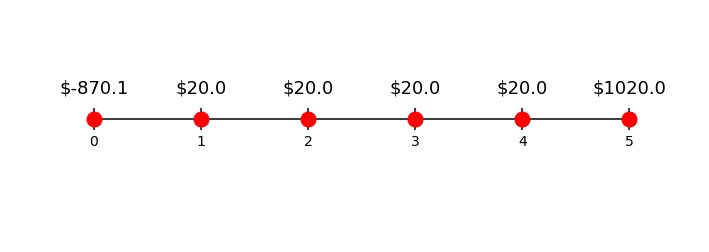

In [6]:
data = [(-PV,0)]
for x,t in zip(payments,time):
    data.append((x,t))

timelinePlot(5,data)

In [7]:
#Now you might be wondering, if I pay 870.1, how do I get to 5% return in period 1?
#Since after all the return of the coupon is...
print(20/PV)

0.02298544894975868


In [8]:
#The trick is understanding that the bond is actually worth more now!
#Let's look at what each payment is worth in time 1
#One way we can do this is by defining time 1 as the new period 0 and shifting everything... so if that were the case
payments = payments[1:]
print(payments)

[20.0, 20.0, 20.0, 1020.0]


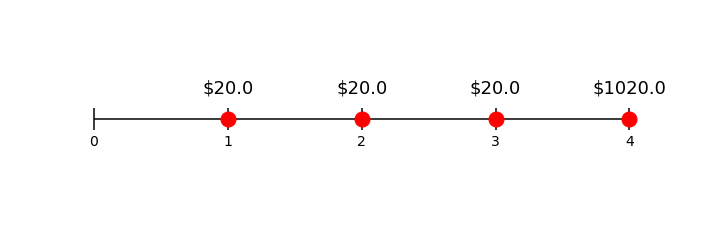

In [9]:
time = list(range(1,5))
data = []
for x,t in zip(payments,time):
    data.append((x,t))

timelinePlot(4,data)

In [10]:
time = list(range(1,6))
#Now let's say we have r=5%, what is our present value of the bond?
PV = sum([x/(1.05)**t for x,t in zip(payments,time)])
print(PV)

893.621484875129


In [11]:
#The bond is now worth more because the remaining coupons, and more importantly the large payment at the end
#are discounted less
#So we get $20 as well a bond that is now worth more if we want to sell it
print((893.621484875129+20)/870.1156998810752)
#5% Return

1.05


In [12]:
#A bond is an annuity plus a face value payment at the end, so we can define it as our annuity formula plus face value
#discounted back
def annuityTVM(P,n,r):
    annuityFactor = (1-(1+r)**-n)/r
    annuity = annuityFactor*P
    return annuity
def bond(FV,cr,n,r):
    #payment is equal to the coupon rate times the FV
    P = FV*cr
    annuityPV = annuityTVM(P,n,r)
    return annuityPV+(FV)/(1+r)**n

In [13]:
print(bond(1000,.02,5,.05))
#Same value as before

870.1156998810752


In [14]:
#If we pay less for our bond than the face value then we say we are buying at a discount
#Let's see how the value of our bond changes as we get closer to the maturity date

In [15]:
n = 10
FV = 1000
cr = .02
r = .05
time = list(range(n))
timeLeft = [n-x for x in time]
PV = []
for i in timeLeft:
    val = bond(FV,cr,i,r)
    PV.append(val)
    print(val)
#As we get closer to maturity, our bond appreciates in value

768.3479521244554
786.7653497306782
806.1036172172122
826.4087980780728
847.7292379819763
870.1156998810752
893.6214848751291
918.3025591188856
944.21768707483
971.4285714285713


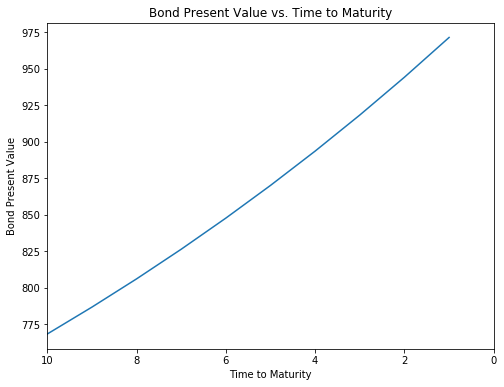

In [16]:
plt.rcParams["figure.figsize"] = [8,6]
plt.plot(timeLeft,PV)
plt.xlim([10,0])
plt.xlabel("Time to Maturity")
plt.ylabel("Bond Present Value")
plt.title("Bond Present Value vs. Time to Maturity")
plt.show()

In [17]:
#When a bond has a coupon rate that equals r, it is priced at par, let's see why
plt.rcParams["figure.figsize"] = [12,4]
FV = 1000
cr = .05
r = .05
n = 5
print(bond(FV,cr,n,r))

999.9999999999999


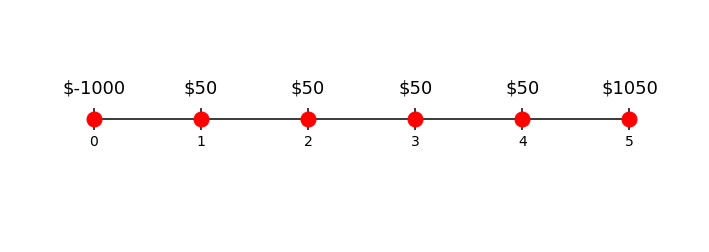

In [18]:
data = [(-1000,0)]
for t in range(1,n):
    data.append((50,t))
data.append((1050,5))
timelinePlot(5,data)

In [19]:
#If you notice, the return on our bond from 0 to 1, is 5% because we have a $50 return on a $1000 investment
print(50/1000)

0.05


In [20]:
#The value/price of the bond stays the same, so there are no gains from bond price appreciation like in the discount bond
print(bond(FV,cr,n-1,r))

1000.0


In [21]:
n = 10
FV = 1000
cr = [.02,.05]
r = .05
time = list(range(n))
timeLeft = [n-x for x in time]
data = []
#Loop through the credit rates and get the present values at the different maturities
for cr_i in cr:
    PV = []
    for i in timeLeft:
        val = bond(FV,cr_i,i,r)
        PV.append(val)
    data.append(PV)
print(data)

[[768.3479521244554, 786.7653497306782, 806.1036172172122, 826.4087980780728, 847.7292379819763, 870.1156998810752, 893.6214848751291, 918.3025591188856, 944.21768707483, 971.4285714285713], [1000.0, 999.9999999999999, 1000.0, 1000.0, 999.9999999999998, 999.9999999999999, 1000.0, 1000.0, 1000.0, 1000.0]]


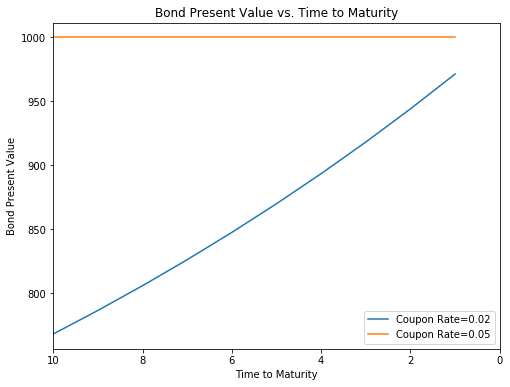

In [22]:
plt.rcParams["figure.figsize"] = [8,6]
for PV,cr_i in zip(data,cr):
    plt.plot(timeLeft,PV,label="Coupon Rate="+str(cr_i))
plt.xlim([10,0])
plt.xlabel("Time to Maturity")
plt.ylabel("Bond Present Value")
plt.title("Bond Present Value vs. Time to Maturity")
plt.legend()
plt.show()

In [23]:
#When we have a bond where the coupon rate is beter than r, we actually pay more for it since
#we are earning interest at a better rate than we could holding the money in the bank
n = 10
FV = 1000
cr = [.02,.05,.1]
r = .05
time = list(range(n))
timeLeft = [n-x for x in time]
data = []
#Loop through the credit rates and get the present values at the different maturities
for cr_i in cr:
    PV = []
    for i in timeLeft:
        val = bond(FV,cr_i,i,r)
        PV.append(val)
    data.append(PV)
print(data)

[[768.3479521244554, 786.7653497306782, 806.1036172172122, 826.4087980780728, 847.7292379819763, 870.1156998810752, 893.6214848751291, 918.3025591188856, 944.21768707483, 971.4285714285713], [1000.0, 999.9999999999999, 1000.0, 1000.0, 999.9999999999998, 999.9999999999999, 1000.0, 1000.0, 1000.0, 1000.0], [1386.0867464592409, 1355.3910837822027, 1323.160637971313, 1289.3186698698787, 1253.7846033633723, 1216.473833531541, 1177.2975252081183, 1136.162401468524, 1092.9705215419503, 1047.6190476190477]]


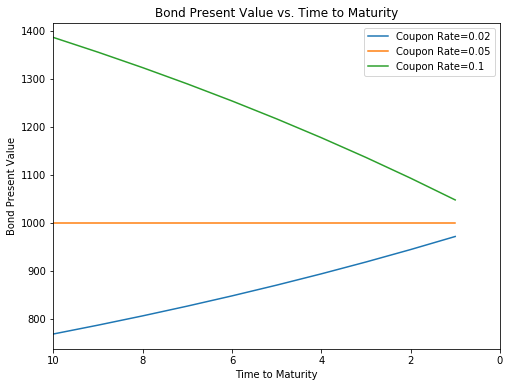

In [24]:
plt.rcParams["figure.figsize"] = [8,6]
for PV,cr_i in zip(data,cr):
    plt.plot(timeLeft,PV,label="Coupon Rate="+str(cr_i))
plt.xlim([10,0])
plt.xlabel("Time to Maturity")
plt.ylabel("Bond Present Value")
plt.title("Bond Present Value vs. Time to Maturity")
plt.legend()
plt.show()
#The three converge

In [25]:
#Look at how our rate is still 5%
n = 10
FV = 1000
cr = .1
r = .05
#The price when we buy it with 10 periods to go
price = bond(FV,cr,n,r)
#The difference between the price at with 9 periods and 10 periods to go
diff = bond(FV,cr,n-1,r)-bond(FV,cr,n,r)
#Our coupon payment
print(cr*FV)
#Our change in bond value
print(diff)
print()
#The total value change
print(cr*FV+diff)
#Divided by our initial investment
print((cr*FV+diff)/price)
#5% still

100.0
-30.69566267703817

69.30433732296183
0.04999999999999984


In [26]:
#We can also use the equation to find the coupon rate that corresponds to a certain PV, FV, n and r
PV = 926.399129485853
FV = 1000
n = 10
r = .06

In [27]:
#to find the coupon rate, first we need to figure out what the annuity part of the bond is worth
faceValuePV = FV/(1+r)**n
print(faceValuePV)

558.3947769151179


In [28]:
#So let's take out that from the PV
annuityPV = PV - faceValuePV
print(annuityPV)

368.00435257073514


In [29]:
#So we know that the annuity is worth $368
#We also can find the annuity factor since we have r and n

In [30]:
annuityFactor = (1-(1.06)**-n)/r
print(annuityFactor)

7.360087051414703


In [31]:
#So we know that the payment times the annuity factor is what an annuity's present value equals, so....
coupon = annuityPV/annuityFactor
print(coupon)

50.0


In [32]:
#Coupon rate is coupon/face value
print(coupon/1000)

0.05


In [33]:
#For finding r, we would have a lot more issue
#We could use some advanced libraries, but that's a little too advanced for this course
#Instead, we can try different rates of r and see which one finds us the right present value
PV = 768.3479521244554
FV = 1000
cr = .02
n = 10

In [34]:
#Let's try to see what our PV would be if r=2%
print(bond(FV,cr,n,.02))
#That is not the correct r because the PV is different
#The difference is...
print()
print(bond(FV,cr,n,.02)-PV)

1000.0

231.65204787554455


In [35]:
#What we could do is test different rates and see which one gets us closest to the PV we are given
rates = [x/100 for x in range(1,13)]
print(rates)

[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12]


In [36]:
values = [bond(FV,cr,n,x) for x in rates]
print(values)

[1094.7130453070167, 1000.0, 914.6979716322417, 837.7820844128994, 768.3479521244554, 705.596517943412, 648.8209229533697, 597.3951160635131, 550.7639609188691, 508.4346315436251, 469.9691189972911, 434.97769715891326]


In [37]:
#Differences
diff = [abs(x-PV) for x in values]
print(diff)

[326.3650931825613, 231.65204787554455, 146.35001950778621, 69.43413228844395, 0.0, 62.751434181043464, 119.5270291710857, 170.95283606094233, 217.58399120558636, 259.9133205808304, 298.37883312716434, 333.3702549655422]


In [38]:
#So let's grab the minimum error
print(min(diff))

0.0


In [39]:
#Get the index of it
i = diff.index(min(diff))
print(i)

4


In [40]:
#And find the rate that got us there
print(rates[i])

0.05


In [41]:
print(PV)
print(bond(FV,cr,n,rates[i]))

768.3479521244554
768.3479521244554
